# My ever growing notebook of Python notes 
**Author**: Devon O'Rourke  
**Written**: 14-March-2018  
**Edited**:  
**Access**: see github.com/devonorourke/digitalHeap (no promises that link still works)  
**Motivation**: I wanted to learn some basic Python stuff when the power went out and I had sporadic interent access. Plus I wanted to use the Seaborn package to make cool plots.  


## Example 1 - token example of what to import and how to generate simple plot

See seaborn.pydata.org/tutorial for this example and many more details.  

For older versions of iPython notebook, you might need to execute the following one-liner:
```
%matplotlib inline
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, integrate
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

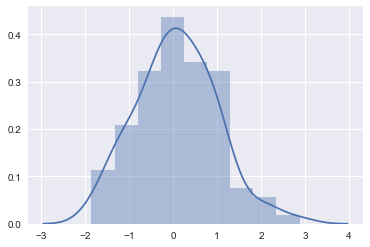

In [4]:
np.random.seed(sum(map(ord, "distributions")))
x = np.random.normal(size = 100)
sns.distplot(x);

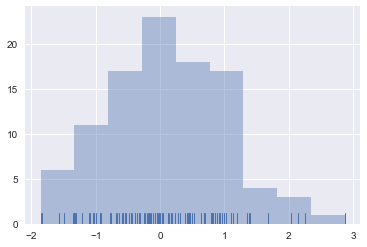

In [5]:
sns.distplot(x, kde=False, rug=True);

## Example 2: importing a dataset from `.csv` file type
See [this Data Carpentry tutorial](http://www.datacarpentry.org/python-ecology-lesson/01-starting-with-data/) for more helpful data manipulation practices - I used Chapters 01 and 02 to get started here with some basic data manipulation.

In [12]:
import pandas as pd
import requests

In [14]:
## import the data from a Github repo:
url='https://raw.githubusercontent.com/devonorourke/guano/master/Perlut/data/Routput/master.csv'
df=pd.read_csv(url)

In [17]:
## what are the column (header) names?
headers = df.dtypes.index
print(headers)

Index(['SampleID', 'OTUid', 'TaxMethod', 'AlignScore', 'BOLDid',
       'kingdom_name', 'phylum_name', 'class_name', 'order_name',
       'family_name', 'genus_name', 'species_name', 'CountReads', 'BOLDalt',
       'Species', 'AgeClass', 'Sex', 'Date', 'NestBox', 'uneID', 'Sequenced',
       'onclick'],
      dtype='object')


In [26]:
## what kind of class is this object (we assume it's a 'data.frame')?
type(df)

pandas.core.frame.DataFrame

In [29]:
## how is each variable interpreted (ie. like 'str(data.frame)' in R...)?
df.dtypes.head()

SampleID       object
OTUid          object
TaxMethod      object
AlignScore    float64
BOLDid         object
dtype: object

In [41]:
## print all values from one field of data - (ex. all values from `BOLDalt' header):
df_ex1 = df[['BOLDalt']]
df_ex1.head()    # note the `.head()` addition reduces the length of the printed output

,BOLDalt
0,BOLD:ACD0295
1,BOLD:ABA8301
2,BOLD:ABA5203
3,BOLD:AAX9373
4,BOLD:AAA8153


In [36]:
## what are the unique values within a single field - (ex. unique 'species_name' values)?
unique_species = pd.unique(df['species_name'])
unique_species[:5]    # note the '[:5]' just prints the first five items in the 'unique_species' array; remove it if you want the full list

array([nan, 'Dicranomyia frontalis', 'Platycentropus radiatus',
       'Depressaria radiella', 'Gluphisia septentrionis'], dtype=object)

In [47]:
## print a subset of values from one field of data - (ex. first 5 values from 'SampleID' header):
first5order_name = df[['order_name']]
first5order_name[:5]

,order_name
0,Lepidoptera
1,Diptera
2,Diptera
3,Coleoptera
4,Trichoptera


In [48]:
## print a subset of two fields of data - (ex. the first 10 values from the `SampleID' AND 'BOLDid' headers):
ex3 = df[['SampleID','BOLDid']]
ex3[:10]

,SampleID,BOLDid
0,une-01,BOLD:ACD0295.1
1,une-01,BOLD:ABA8301.5
2,une-01,BOLD:ABA5203.1
3,une-01,BOLD:AAX9373.1
4,une-01,BOLD:AAA8153.1
5,une-01,BOLD:AAH3190.1
6,une-01,BOLD:ABV4420.1
7,une-01,BOLD:AAB6253.1
8,une-02,BOLD:AAA2247.1
9,une-02,BOLD:AAA2482.2


In [ ]:
## print a subset of the data that matches a string - (ex. all rows with 'CountReads' > 500):

In [49]:
ex4 = df[df.CountReads > 500]
ex4.head()

,SampleID,OTUid,TaxMethod,AlignScore,BOLDid,kingdom_name,phylum_name,class_name,order_name,family_name,...,CountReads,BOLDalt,Species,AgeClass,Sex,Date,NestBox,uneID,Sequenced,onclick
8,une-02,OTU46_suspect_mock_chimera,GS,99.4,BOLD:AAA2247.1,Animalia,Arthropoda,Insecta,Lepidoptera,Notodontidae,...,13516,BOLD:AAA2247,TRSW,chicks,U,42917,sokokis_7,2,Y,http://v4.boldsystems.org/index.php/Public_Bar...
9,une-02,OTU51_suspect_mock_chimera,GS,100.0,BOLD:AAA2482.2,Animalia,Arthropoda,Insecta,Lepidoptera,Noctuidae,...,5711,BOLD:AAA2482,TRSW,chicks,U,42917,sokokis_7,2,Y,http://v4.boldsystems.org/index.php/Public_Bar...
11,une-02,OTU65_suspect_mock_chimera,GS,100.0,BOLD:AAB4783.1,Animalia,Arthropoda,Insecta,Lepidoptera,Geometridae,...,3343,BOLD:AAB4783,TRSW,chicks,U,42917,sokokis_7,2,Y,http://v4.boldsystems.org/index.php/Public_Bar...
13,une-02,OTU159_suspect_mock_chimera,GS,100.0,BOLD:AAA2052.4,Animalia,Arthropoda,Insecta,Lepidoptera,Erebidae,...,694,BOLD:AAA2052,TRSW,chicks,U,42917,sokokis_7,2,Y,http://v4.boldsystems.org/index.php/Public_Bar...
14,une-02,OTU195_suspect_mock_chimera,GS,100.0,BOLD:AAJ9298.2,Animalia,Arthropoda,Insecta,Lepidoptera,Geometridae,...,550,BOLD:AAJ9298,TRSW,chicks,U,42917,sokokis_7,2,Y,http://v4.boldsystems.org/index.php/Public_Bar...


In [56]:
## print a subset of data that matches multiple conditions (ex. all rows with 'CountReads' > 500 AND 'SampleID' == une-03)
ex5 = df[(df.CountReads > 500) & (df.SampleID == "une-02")]
ex5.tail(4)    # note that by inserting a value within the 'tail()' parentheses we define the number of rows returned in the print statement

,SampleID,OTUid,TaxMethod,AlignScore,BOLDid,kingdom_name,phylum_name,class_name,order_name,family_name,...,CountReads,BOLDalt,Species,AgeClass,Sex,Date,NestBox,uneID,Sequenced,onclick
9,une-02,OTU51_suspect_mock_chimera,GS,100.0,BOLD:AAA2482.2,Animalia,Arthropoda,Insecta,Lepidoptera,Noctuidae,...,5711,BOLD:AAA2482,TRSW,chicks,U,42917,sokokis_7,2,Y,http://v4.boldsystems.org/index.php/Public_Bar...
11,une-02,OTU65_suspect_mock_chimera,GS,100.0,BOLD:AAB4783.1,Animalia,Arthropoda,Insecta,Lepidoptera,Geometridae,...,3343,BOLD:AAB4783,TRSW,chicks,U,42917,sokokis_7,2,Y,http://v4.boldsystems.org/index.php/Public_Bar...
13,une-02,OTU159_suspect_mock_chimera,GS,100.0,BOLD:AAA2052.4,Animalia,Arthropoda,Insecta,Lepidoptera,Erebidae,...,694,BOLD:AAA2052,TRSW,chicks,U,42917,sokokis_7,2,Y,http://v4.boldsystems.org/index.php/Public_Bar...
14,une-02,OTU195_suspect_mock_chimera,GS,100.0,BOLD:AAJ9298.2,Animalia,Arthropoda,Insecta,Lepidoptera,Geometridae,...,550,BOLD:AAJ9298,TRSW,chicks,U,42917,sokokis_7,2,Y,http://v4.boldsystems.org/index.php/Public_Bar...


In [57]:
## how many rows are in a given data.frame object?
len(ex5)

5

## And finally... the plotting of that `.csv` file!

Let's start by making a histogram, plotting the distribution of the number of reads per observation (ie. number of sequences of a given OTU per sample).

In [66]:
## import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors
sns.set(color_codes=True)

In [ ]:
## import data
url='https://raw.githubusercontent.com/devonorourke/guano/master/Perlut/data/Routput/master.csv'
df=pd.read_csv(url)

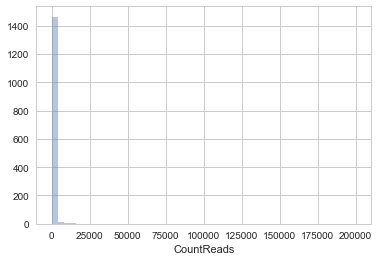

In [99]:
x = df.CountReads
#basic one:
sns.distplot(x, kde=False);

## Notice the number of bins seems off... could set those differently, as shown in next plot

(0, 10000)

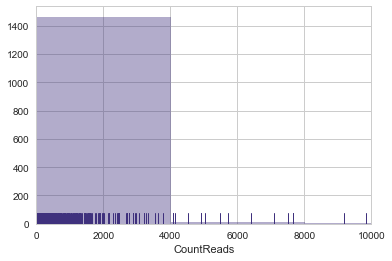

In [105]:
#spiffy one
sns.set_style("whitegrid")
sns.distplot(x, kde=False, rug=True,
             color='#3f317d',
            bins = 100);

plt.xlim(0, 10000)

## We've set the axis to reduce the plotting area, and defined the number of bins to be 100; however this isn't really helpful
## what is needed is to subset the data, then define the number of bins, and eliminate the need for scaling the x-axis range

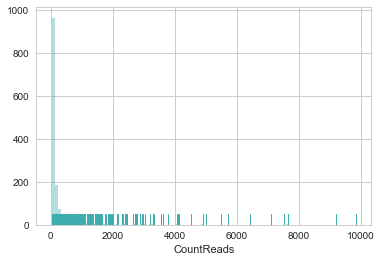

In [112]:
subdf = df[df.CountReads < 10000]
x2 = subdf.CountReads

sns.distplot(x2, kde=False, rug=True,
             color='#3fadaf',
            bins = 100);

## clearly, all our data is squished to the first 100 units (read counts); not a very helpful histogram!